In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras import Model, Input
from keras.layers import Dense, Flatten, Reshape, Rescaling, Convolution2D, MaxPooling2D, AveragePooling2D, Concatenate

from keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
IMG_SHAPE = (28, 28)


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape


(60000, 28, 28)

# Premier exemple

>Jusqu'à présent nous utilisions ```keras.Sequential``` pour construire nos réseaux mais cette façon de procéder ne permet pas de construire des modèles qui seraient plus développés qu'une succession de couches.
>
>L'API fonctionnel de keras nous permet de s'affranchir de cette contrainte sans pour autant trop compliquer le code.
>
>
>La première étape consiste à définir nos inputs. Au minimum nous devons lui fournir la shape de nos entrées. 
```py
IMG_SHAPE = (28, 28)
inputs = Input(IMG_SHAPE)
```
>Ensuite, nous passons nos images de couches en couches comme suit:
```py
x = Reshape((28, 28, 1))(inputs) # inputs are reshaped
x = Rescaling(1./255)(x) # reshaped inputs are rescaled
```
>Nos inputs (i.e. nos images) sont envoyées dans la couche Reshape et sont stockées dans ```x```
>
>Ensuite, elles passent dans la couches rescaling et sont stockées dans ```x```
>
>Et ainsi de suite:
```py
x = Flatten()(x)

x = Dense(50, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
```
>En définitive, nous constituons un ```keras.Model``` en définissant nos entrées et sorties.
>

In [4]:
# full example
inputs = Input(IMG_SHAPE)

x = Reshape((28, 28, 1))(inputs)
x = Rescaling(1./255)(x)

x = Flatten()(x)

x = Dense(50, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

# Second exemple

>L'exemple précédent reste finalement qu'un modèle séquentiel mais construit avec une autre syntaxe.
>
>Voyons ce que l'on peut faire de plus avec cette nouvelle syntaxe.
>
>Nous commençons par définir deux fonctions qui renverront deux modèles différents de la même manière que l'avons fait précédemment.
>
>Il s'agit d'une couche d'entrée qui recevra les images, suivie d'une couche de convolution puis de pooling:
```py
def get_left() -> tf.keras.Model:
    inputs = Input((28, 28, 1))

    x = Convolution2D(32, 8, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(2)(x)

    block = tf.keras.Model(inputs=inputs, outputs=x, name='left')
    return block

def get_right() -> tf.keras.Model:
    inputs = Input((28, 28, 1))

    x = Convolution2D(32, 3, activation='relu', padding='same')(inputs)
    x = AveragePooling2D(2)(x)

    block = tf.keras.Model(inputs=inputs, outputs=x, name='right')
    return block
    
```

>Ce qui change par rapport à notre exemple précédent, c'est que nos images après avoir été reshape et rescale sont envoyées dans les deux sous modèle que nous venons de constituer. Chaque modèle reçoit les mêmes images mais les traite d'une manière différente.
```py
inputs = Input(IMG_SHAPE)

x = Reshape((28, 28, 1))(inputs)
x = Rescaling(1./255)(x)

left = get_left()(x)
right = get_right()(x)
```
>Nous avons dès lors deux sorties que nous pouvons rassembler. Attention aux shapes lors de la concaténation.
```py
x = Concatenate()([left, right])
```

>Enfin nous affichons le modèle:
```py
tf.keras.utils.plot_model(inception, expand_nested=True, show_shapes=True)
```

P.S.: *ne pas oublier de compiler le modèle avant le fit*

In [5]:
def get_left() -> tf.keras.Model:
    inputs = Input((28, 28, 1))

    x = Convolution2D(32, 8, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(2)(x)

    block = tf.keras.Model(inputs=inputs, outputs=x, name='left')
    return block


def get_right() -> tf.keras.Model:
    inputs = Input((28, 28, 1))

    x = Convolution2D(32, 3, activation='relu', padding='same')(inputs)
    x = AveragePooling2D(2)(x)

    block = tf.keras.Model(inputs=inputs, outputs=x, name='right')
    return block


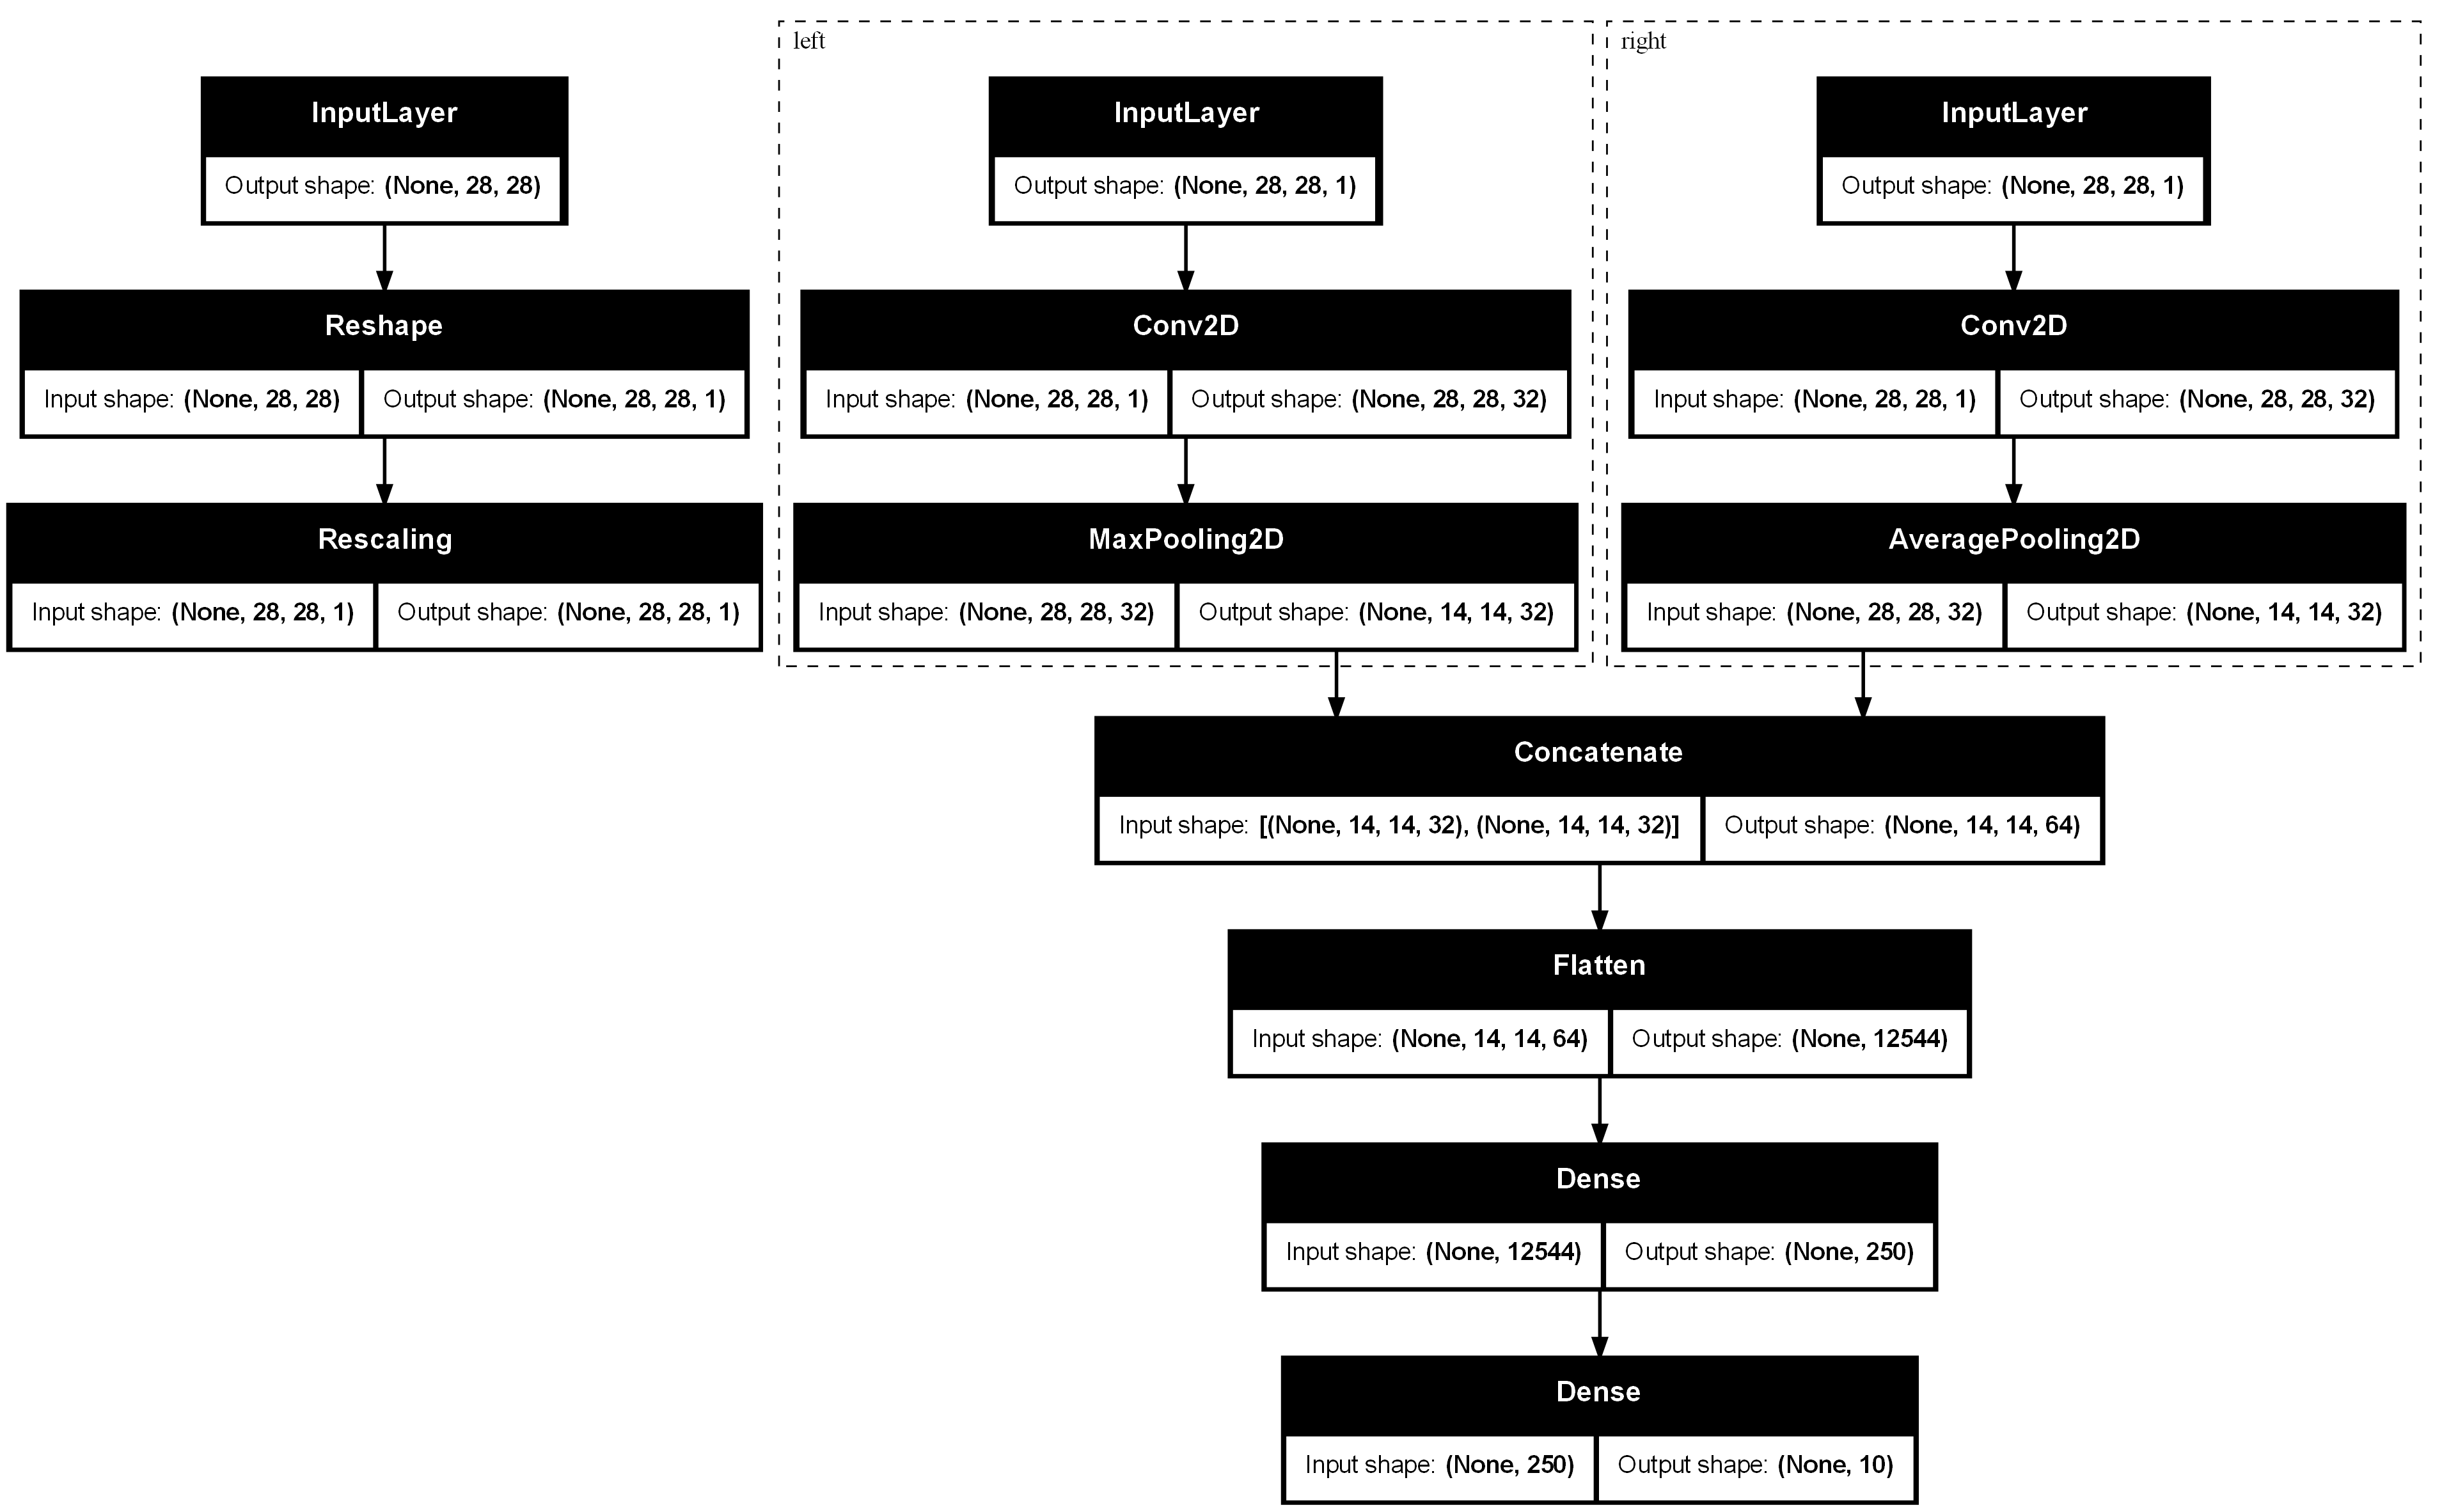

In [6]:
inputs = Input(IMG_SHAPE)

x = Reshape((28, 28, 1))(inputs)
x = Rescaling(1./255)(x)

left = get_left()(x)
right = get_right()(x)

x = Concatenate()([left, right])

x = Flatten()(x)

x = Dense(250, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

inception = Model(inputs, output, name='inception')

### compiler ici une foit que le modèle est fini: TOUJOURS AVANT "FIT"
### compiler -> traduire OBJET_PYTHON/FONCTION_PYTHON -> OBJET_C++/FONCTION_C++ (plus rapide)
inception.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


tf.keras.utils.plot_model(inception, expand_nested=True, show_shapes=True)


In [7]:
inception.fit(X_train, y_train, validation_split=.2, epochs=3, batch_size=256)

Epoch 1/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 35s 164ms/step - accuracy: 0.8551 - loss: 0.4871 - val_accuracy: 0.9762 - val_loss: 0.0810
Epoch 2/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 157ms/step - accuracy: 0.9777 - loss: 0.0755 - val_accuracy: 0.9843 - val_loss: 0.0552
Epoch 3/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 160ms/step - accuracy: 0.9878 - loss: 0.0398 - val_accuracy: 0.9832 - val_loss: 0.0513
